In [19]:
import tensorflow as tf
import json
import matplotlib.pyplot as plt
import numpy as np
import time
import os

from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
# Suppress TensorFlow logging except for fatal errors.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# **CNN Model Evaluations: Charts and Results**



#### **<span style="color:blue"> Blue </span> and <span style="color:green"> Green </span> Chart (Training and Validation Accuracy):**

- The x-axis represents the epochs, showing the progress of training over time from epoch 1 to 10.
- The y-axis represents accuracy, which in this case measures the proportion of correct predictions made by the model.
- The blue line (marked with blue dots) tracks the training accuracy at each epoch.
- The solid blue line tracks the validation accuracy at each epoch. This measures how well the model performs on a separate set of data not seen during training, providing an indication of how well the model generalizes.

#### **<span style="color:red"> Red </span> and <span style="color:purple"> Purple </span> Chart (Training and Validation Accuracy):**

- The x-axis again represents the epochs.
- The y-axis represents loss, which is a measure of the prediction error made by the model. Lower values are better as they indicate a smaller error.
- The red dots represent the training loss at each epoch, showing how the model's error decreases as it learns.
- The solid red line represents the validation loss, which tracks how the prediction error evolves on the validation dataset.

# **CNN Models: Shallow vs Deep**

### **Load Models**

In [6]:
# Specify model history file names
shallow_model_file = 'json/cnn_model_shallow.json'
deep_model_file = 'json/cnn_model_deep.json'

# Function to load model history
def load_model_history(file_name):
    try:
        with open(file_name, 'r') as file:
            return json.load(file)
    except FileNotFoundError:
        print(f"Error: The file {file_name} does not exist.")
        return {}  # Assign an empty dictionary to prevent further errors if file is not found


In [9]:
# Load the training histories
history_shallow = load_model_history(shallow_model_file)
history_deep = load_model_history(deep_model_file)

# Access the history dictionaries
acc_shallow = history_shallow.get('accuracy', [])
val_acc_shallow = history_shallow.get('val_accuracy', [])
loss_shallow = history_shallow.get('loss', [])
val_loss_shallow = history_shallow.get('val_loss', [])

acc_deep = history_deep.get('accuracy', [])
val_acc_deep = history_deep.get('val_accuracy', [])
loss_deep = history_deep.get('loss', [])
val_loss_deep = history_deep.get('val_loss', [])

# Ensure both histories have the same number of epochs
epochs = range(1, min(len(acc_shallow), len(acc_deep)) + 1)

## **CNN Model: Shallow vs Deep - Training and Validation Accuracy Data Visualization**

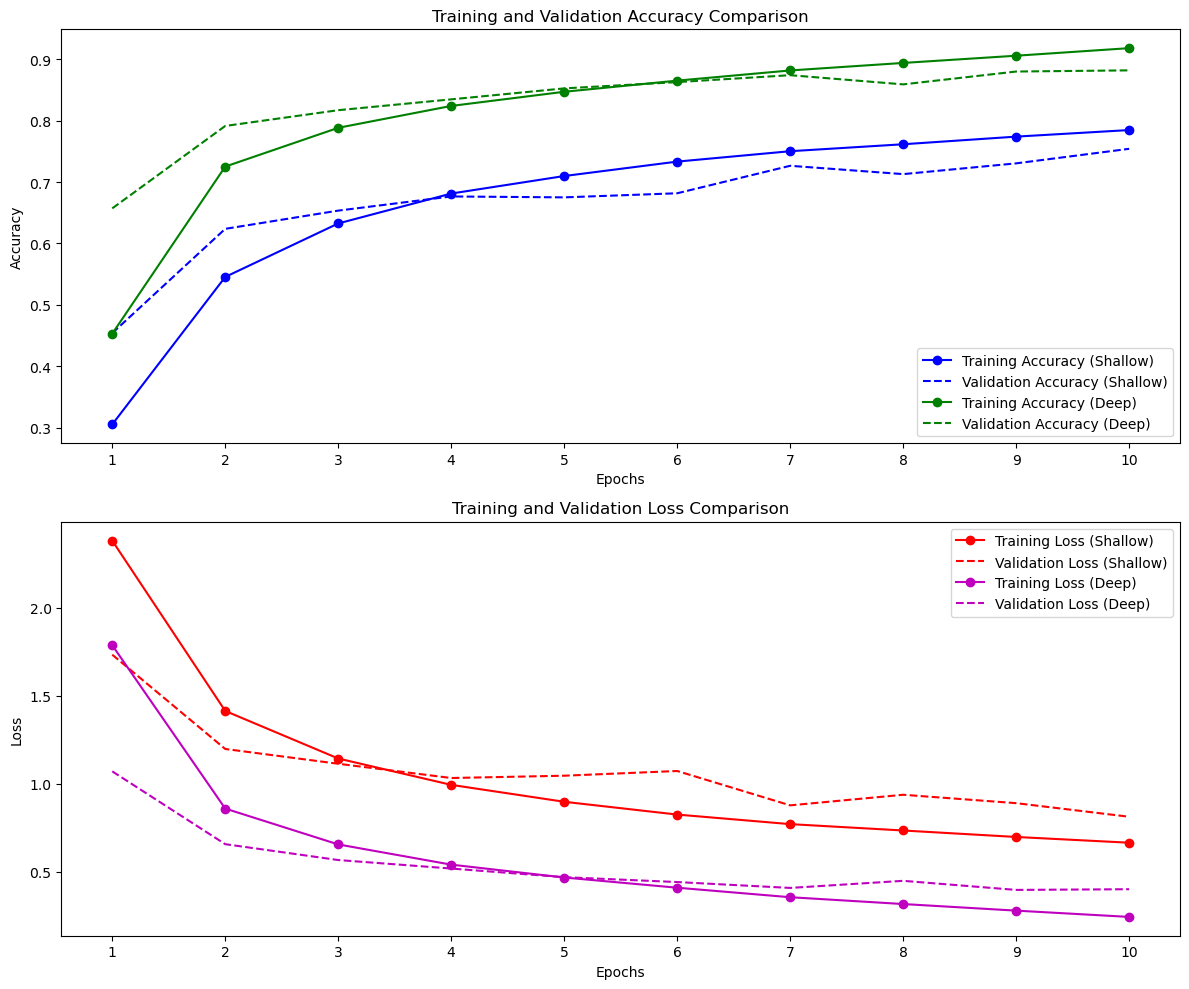

In [10]:
# Plotting
plt.figure(figsize=(12, 10))

# Accuracy subplot
plt.subplot(2, 1, 1)
plt.plot(epochs, acc_shallow, 'bo-', label='Training Accuracy (Shallow)')
plt.plot(epochs, val_acc_shallow, 'b--', label='Validation Accuracy (Shallow)')
plt.plot(epochs, acc_deep, 'go-', label='Training Accuracy (Deep)')
plt.plot(epochs, val_acc_deep, 'g--', label='Validation Accuracy (Deep)')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(epochs))  # Set x-ticks to show each epoch
plt.legend()

# Loss subplot
plt.subplot(2, 1, 2)
plt.plot(epochs, loss_shallow, 'ro-', label='Training Loss (Shallow)')
plt.plot(epochs, val_loss_shallow, 'r--', label='Validation Loss (Shallow)')
plt.plot(epochs, loss_deep, 'mo-', label='Training Loss (Deep)')
plt.plot(epochs, val_loss_deep, 'm--', label='Validation Loss (Deep)')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(epochs))  # Set x-ticks to show each epoch
plt.legend()

plt.tight_layout()
plt.show()

### **CNN Models: Shallow vs Deep - Epochs 1-10**

In [11]:
# Print the epoch-wise training and validation metrics for both models
print("Epoch-wise Training and Validation Metrics:")
# Ensure both models have the same number of epochs; if not, loop over the minimum of both
max_epochs = min(len(history_shallow['accuracy']), len(history_deep['accuracy']))
for epoch in range(max_epochs):
    print(f"Epoch {epoch+1}:")
    print(f"    Shallow Model - Training Accuracy: {history_shallow['accuracy'][epoch]}")
    print(f"    Shallow Model - Validation Accuracy: {history_shallow['val_accuracy'][epoch]}")
    print(f"    Shallow Model - Training Loss: {history_shallow['loss'][epoch]}")
    print(f"    Shallow Model - Validation Loss: {history_shallow['val_loss'][epoch]}")
    print(f"    Deep Model - Training Accuracy: {history_deep['accuracy'][epoch]}")
    print(f"    Deep Model - Validation Accuracy: {history_deep['val_accuracy'][epoch]}")
    print(f"    Deep Model - Training Loss: {history_deep['loss'][epoch]}")
    print(f"    Deep Model - Validation Loss: {history_deep['val_loss'][epoch]}")

Epoch-wise Training and Validation Metrics:
Epoch 1:
    Shallow Model - Training Accuracy: 0.3050903379917145
    Shallow Model - Validation Accuracy: 0.4538595974445343
    Shallow Model - Training Loss: 2.380911350250244
    Shallow Model - Validation Loss: 1.732782006263733
    Deep Model - Training Accuracy: 0.4529094099998474
    Deep Model - Validation Accuracy: 0.657202959060669
    Deep Model - Training Loss: 1.7864820957183838
    Deep Model - Validation Loss: 1.0697715282440186
Epoch 2:
    Shallow Model - Training Accuracy: 0.5454339385032654
    Shallow Model - Validation Accuracy: 0.6238484978675842
    Shallow Model - Training Loss: 1.4130140542984009
    Shallow Model - Validation Loss: 1.19693124294281
    Deep Model - Training Accuracy: 0.7252859473228455
    Deep Model - Validation Accuracy: 0.7915343046188354
    Deep Model - Training Loss: 0.8582602143287659
    Deep Model - Validation Loss: 0.655885636806488
Epoch 3:
    Shallow Model - Training Accuracy: 0.632613

## **CNN Models: Shallow vs Deep - Model Predictions on myImages**

In [14]:
# Load both models
scratch_model_shallow = load_model('h5/scratch_model_shallow.h5')
scratch_model_deep = load_model('h5/scratch_model_deep.h5')

1/1 [==============================] - 0s 20ms/step
Prediction for myImages/three2.png:
    Shallow Model: three2
    Deep Model: three2


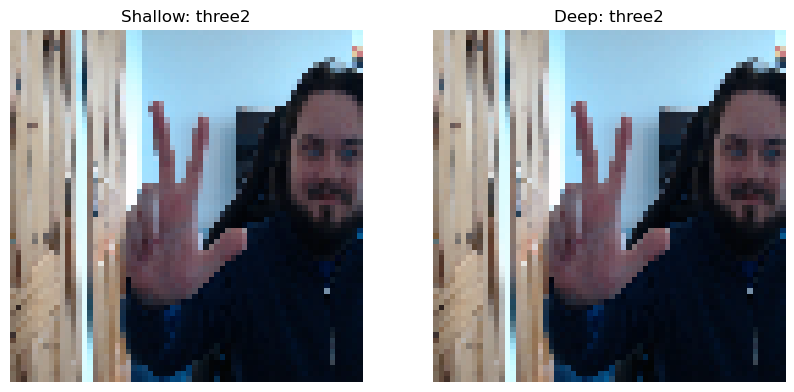

1/1 [==============================] - 0s 19ms/step
Prediction for myImages/rock.png:
    Shallow Model: rock
    Deep Model: rock


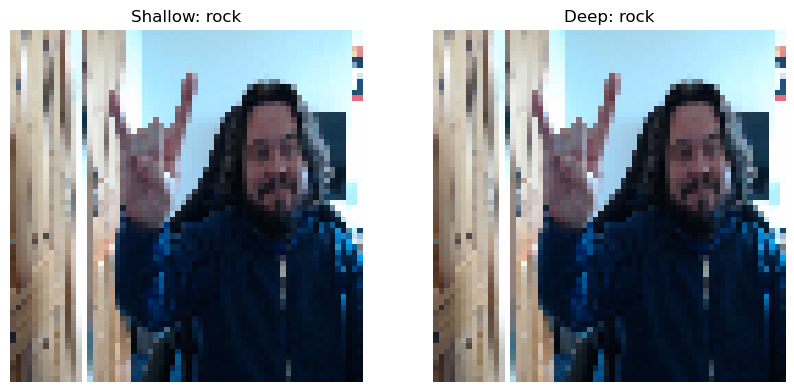

1/1 [==============================] - 0s 20ms/step
Prediction for myImages/ok.jpg:
    Shallow Model: call
    Deep Model: ok


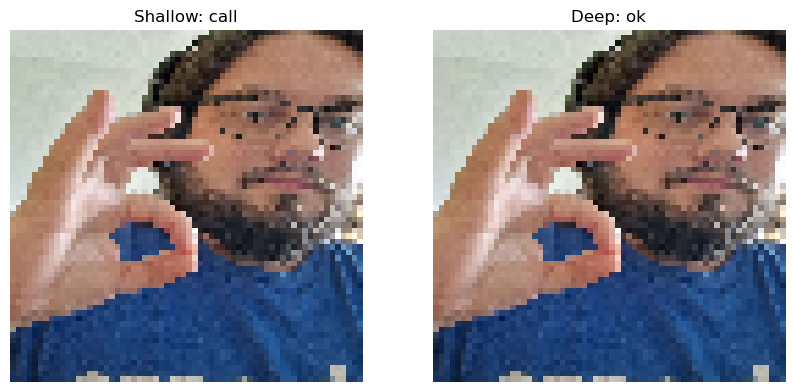

1/1 [==============================] - 0s 25ms/step
Prediction for myImages/two_up_inverted.png:
    Shallow Model: two_up_inverted
    Deep Model: two_up_inverted


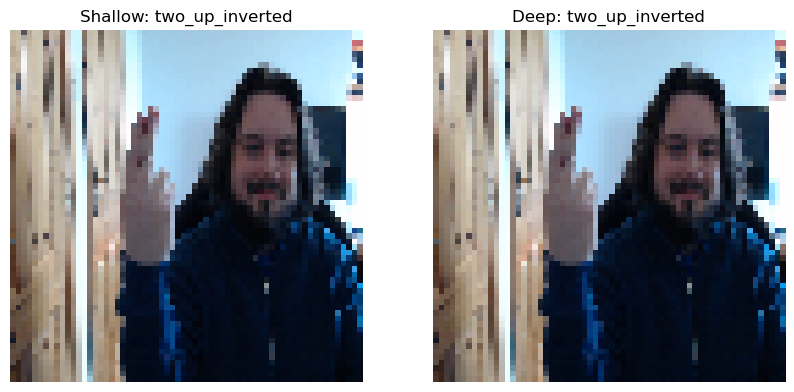

In [16]:
# Class names for prediction
class_names = ['call', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one', 'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted', 'three', 'three2', 'two_up', 'two_up_inverted']

def predict_gesture(model, img_path, class_names):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch dimension

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    return predicted_class, img

gesture_images = ['myImages/three2.png', 'myImages/rock.png', 'myImages/ok.jpg', 'myImages/two_up_inverted.png']

# Loop through each image, make predictions, and display results side by side
for img_path in gesture_images:
    predicted_gesture_shallow, img_shallow = predict_gesture(scratch_model_shallow, img_path, class_names)
    predicted_gesture_deep, img_deep = predict_gesture(scratch_model_deep, img_path, class_names)
    
    # Print predictions
    print(f"Prediction for {img_path}:")
    print(f"    Shallow Model: {predicted_gesture_shallow}")
    print(f"    Deep Model: {predicted_gesture_deep}")
    
    # Set up matplotlib subplot
    plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
    # Display image for shallow model
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first column
    plt.imshow(image.img_to_array(img_shallow) / 255.)
    plt.title(f"Shallow: {predicted_gesture_shallow}")
    plt.axis('off')
    
    # Display image for deep model
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second column
    plt.imshow(image.img_to_array(img_deep) / 255.)
    plt.title(f"Deep: {predicted_gesture_deep}")
    plt.axis('off')
    
    plt.show()

## **CNN Models: Shallow vs Deep - Inference Time**

In [17]:
# Load the dataset Shallow Models were trained on
path_to_load_shallow_dataset = 'savedDatasetShallowRGB'
test_ds_shallow = tf.data.experimental.load(path_to_load_shallow_dataset + '/test')

# Load the dataset Deep Models were trained on
path_to_load_deep_dataset = 'savedDatasetDeepRGB'
test_ds_deep = tf.data.experimental.load(path_to_load_deep_dataset + '/test')

Instructions for updating:
Use `tf.data.Dataset.load(...)` instead.


In [21]:
# Function to measure inference time
def measure_inference_time(model, dataset):
    start_time = time.time()
    model.evaluate(dataset)
    elapsed_time = time.time() - start_time
    return elapsed_time

# Measure the inference time
inference_time_shallow = measure_inference_time(scratch_model_shallow, test_ds_shallow)
print(f"Inference Time for Shallow Model: {inference_time_shallow:.3f} seconds")

inference_time_deep = measure_inference_time(scratch_model_deep, test_ds_deep)
print(f"Inference Time for Deep Model: {inference_time_deep:.3f} seconds")

394/394 [==============================] - 2s 4ms/step - loss: 0.8187 - accuracy: 0.7496
Inference Time for Shallow Model: 1.989 seconds
394/394 [==============================] - 2s 4ms/step - loss: 0.4036 - accuracy: 0.8826
Inference Time for Deep Model: 1.901 seconds
